# 파이토치 구성요소
* torch : 텐서를 자동으로 생성
* torch.autograd : 자동미분 기능
* torch.nn : 신경망을 자동 생성
* torch.multiprocessing : 병렬처리 기능
* torch.utils : 데이터 조작 유틸리티 기능
* torch.legacy : Torch로부터 포팅해온 코드
* torch.onnx : 서로 다른 프레임워크 간의 모델을 공유

# 텐서(Tensors)
* numpy의 ndarray와 유사

In [1]:
import torch

In [2]:
torch.__version__

'1.10.0+cu111'

## 초기화 되지 않는 행렬(empty)
* 주어진 크기의 아무값으로도 초기화 되지 않은 텐서 제작
* 텐서 성분의 값은 쓰레기

In [3]:
x = torch.empty(4, 2)
print(x)

tensor([[6.2855e+27, 3.0928e-41],
        [3.3631e-44, 0.0000e+00],
        [       nan, 6.4460e-44],
        [1.1578e+27, 1.1362e+30]])


## 무작위로 초기화된 행렬(rand)
* rand : 0 ~ 1 사이의 랜덤 값
* randn : 평균이 0이고 분산이 1인 랜덤 값 

In [5]:
x = torch.rand(4,2)
print(x)

tensor([[0.7436, 0.2313],
        [0.2622, 0.2871],
        [0.0420, 0.4401],
        [0.9683, 0.7359]])


## dtype이 long, 0으로 채워진 tensor

In [6]:
x= torch.zeros(4, 2, dtype =torch.long)
print(x)

tensor([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])


In [7]:
x= torch.tensor([3, 2.3])
print(x)

tensor([3.0000, 2.3000])


In [8]:
x = x.new_ones(2, 4, dtype = torch.double)
print(x)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)


In [10]:
x = torch.rand_like(x, dtype = torch.float)
print(x)

tensor([[0.8892, 0.0323, 0.7885, 0.2996],
        [0.1725, 0.2274, 0.0124, 0.7085]])


In [11]:
x.size()

torch.Size([2, 4])

# 1. 텐서의 연산

## 덧셈

In [12]:
print(x)

tensor([[0.8892, 0.0323, 0.7885, 0.2996],
        [0.1725, 0.2274, 0.0124, 0.7085]])


In [14]:
y = torch.rand(2, 4)
print(y)
print(x + y)

tensor([[0.4153, 0.5043, 0.1995, 0.1600],
        [0.9219, 0.7317, 0.1600, 0.0800]])
tensor([[1.3045, 0.5366, 0.9881, 0.4595],
        [1.0943, 0.9591, 0.1725, 0.7885]])


## 덧셈 2

In [15]:
print(torch.add(x, y))

tensor([[1.3045, 0.5366, 0.9881, 0.4595],
        [1.0943, 0.9591, 0.1725, 0.7885]])


## 덧셈 3
* 텐서를 인자로 활용

In [17]:
result = torch.empty(2,4)
torch.add(x, y, out = result)
print(result)

tensor([[1.3045, 0.5366, 0.9881, 0.4595],
        [1.0943, 0.9591, 0.1725, 0.7885]])


## 덧셈 4
* in-place 방식 : 텐서의 값을 변경하는 연산 뒤에는 '_'가 붙음

In [18]:
print(x)
print(y)
y.add_(x)
print(y)

tensor([[0.8892, 0.0323, 0.7885, 0.2996],
        [0.1725, 0.2274, 0.0124, 0.7085]])
tensor([[0.4153, 0.5043, 0.1995, 0.1600],
        [0.9219, 0.7317, 0.1600, 0.0800]])
tensor([[1.3045, 0.5366, 0.9881, 0.4595],
        [1.0943, 0.9591, 0.1725, 0.7885]])


## 그 외의 연산
* torch.sub : 뺄셈
* torch.mul : 곱셈
* torch.div : 나눗셈
* torch.mm : 내적(dot product)

In [21]:
x = torch.Tensor([[1,3],[5,7]])
y = torch.Tensor([[2,4],[6,8]])

print(x -y)
print(torch.sub(x, y))
print(x.sub(y))

tensor([[-1., -1.],
        [-1., -1.]])
tensor([[-1., -1.],
        [-1., -1.]])
tensor([[-1., -1.],
        [-1., -1.]])


## 텐서의 조작

### 인덱싱
* 넘파이처럼 인덱싱 사용 가능

In [22]:
print(x)
print(x[:,1])

tensor([[1., 3.],
        [5., 7.]])
tensor([3., 7.])


### view
* 텐서의 크기나 모양을 변경

In [24]:
x = torch.randn(4, 5)
y = x.view(20)
z = x.view(5, -1)

print(x.size())
print(x)

print(y.size())
print(y)

print(z.size())
print(z)

torch.Size([4, 5])
tensor([[-7.3866e-01,  8.0849e-01, -8.2815e-01,  4.4599e-01,  5.7199e-03],
        [ 6.6442e-01,  6.9075e-01, -1.5768e+00,  2.2021e+00, -8.5064e-01],
        [ 2.6829e-01, -8.5246e-01, -3.1653e-01, -4.9800e-03,  8.6953e-01],
        [ 2.0000e+00, -2.1552e-01, -3.9279e-01,  7.6662e-04,  6.0157e-01]])
torch.Size([20])
tensor([-7.3866e-01,  8.0849e-01, -8.2815e-01,  4.4599e-01,  5.7199e-03,
         6.6442e-01,  6.9075e-01, -1.5768e+00,  2.2021e+00, -8.5064e-01,
         2.6829e-01, -8.5246e-01, -3.1653e-01, -4.9800e-03,  8.6953e-01,
         2.0000e+00, -2.1552e-01, -3.9279e-01,  7.6662e-04,  6.0157e-01])
torch.Size([5, 4])
tensor([[-7.3866e-01,  8.0849e-01, -8.2815e-01,  4.4599e-01],
        [ 5.7199e-03,  6.6442e-01,  6.9075e-01, -1.5768e+00],
        [ 2.2021e+00, -8.5064e-01,  2.6829e-01, -8.5246e-01],
        [-3.1653e-01, -4.9800e-03,  8.6953e-01,  2.0000e+00],
        [-2.1552e-01, -3.9279e-01,  7.6662e-04,  6.0157e-01]])


### item
* 텐서의 값이 단 하나라도 존재하면 숫자값을 얻을 수 있음

In [25]:
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([0.9220])
0.921959400177002
torch.float32


* 스칼라값 하나만 존재

### squeeze
* 차원을 축소

In [27]:
tensor = torch.rand(1,3,3)
tensor.shape

torch.Size([1, 3, 3])

In [29]:
t = tensor.squeeze()

print(t)
print(t.shape)

tensor([[0.7332, 0.5606, 0.7932],
        [0.7772, 0.5600, 0.4649],
        [0.9912, 0.1553, 0.4088]])
torch.Size([3, 3])


### unsqueeze(차원 증가)

In [30]:
tensor = torch.rand(1,3,3)
tensor.shape

torch.Size([1, 3, 3])

In [32]:
t = tensor.unsqueeze(dim = 0)

print(t)
print(t.shape)

tensor([[[[0.6700, 0.5907, 0.7296],
          [0.6503, 0.2847, 0.7842],
          [0.3363, 0.2386, 0.3970]]]])
torch.Size([1, 1, 3, 3])


### stack
* 텐서간 결합

In [33]:
x = torch.FloatTensor([1,4])
y = torch.FloatTensor([2,5])
z = torch.FloatTensor([3,6])

print(torch.stack([x,y,z]))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


### cat
* 텐서를 결합하는 메소드
* 쌓을 dim이 무조건 존재해야 가능

In [36]:
a = torch.FloatTensor(1,1,3,3)
b = torch.FloatTensor(1,1,3,3)
c = torch.cat((a,b), dim = 0)

print(c)
print(c.shape)

tensor([[[[1.0338e+28, 3.0928e-41, 3.5032e-44],
          [0.0000e+00,        nan, 0.0000e+00],
          [4.4721e+21, 3.0104e+29, 7.1853e+22]]],


        [[[1.0338e+28, 3.0928e-41, 3.9236e-44],
          [0.0000e+00,        nan, 0.0000e+00],
          [4.4721e+21, 2.8799e+32, 1.3816e+31]]]])
torch.Size([2, 1, 3, 3])


### chuck
* 텐서를 여러개로 나눔
* 몇 개로 나눌 것인가

In [39]:
tensor = torch.randn(3,6)
t1,t2,t3 = torch.chunk(tensor, 3, dim = 1)

print(tensor)
print(t1)
print(t2)

tensor([[ 1.4761, -0.6633,  1.8765,  2.1984,  0.0548, -0.5214],
        [-0.4476,  0.5942,  1.4162, -3.0600, -0.4497, -0.1035],
        [ 2.0431, -0.3467,  1.7251, -0.3290,  1.7909,  0.8809]])
tensor([[ 1.4761, -0.6633],
        [-0.4476,  0.5942],
        [ 2.0431, -0.3467]])
tensor([[ 1.8765,  2.1984],
        [ 1.4162, -3.0600],
        [ 1.7251, -0.3290]])


### split
* 하나의 텐서당 크기가 얼마인지
* 몇 개씩 나눌 것인가

In [41]:
tensor = torch.randn(3,6)
t1,t2= torch.split(tensor, 3, dim = 1)

print(tensor)
print(t1)
print(t2)

tensor([[ 1.1054,  0.7048,  1.1899, -0.0785,  0.3468,  0.7595],
        [-0.5458, -0.4991, -0.7236,  2.4776,  2.2690, -0.3850],
        [-1.6897, -0.8519, -1.7531,  0.5780, -0.5689, -1.3023]])
tensor([[ 1.1054,  0.7048,  1.1899],
        [-0.5458, -0.4991, -0.7236],
        [-1.6897, -0.8519, -1.7531]])
tensor([[-0.0785,  0.3468,  0.7595],
        [ 2.4776,  2.2690, -0.3850],
        [ 0.5780, -0.5689, -1.3023]])


### torch <-> numpy
* TorchTensor를 numpy로 변환 가능
* Tensor가 cpu상에 있다면 numpy 배열은 메모리를 공유하므로 변화에 영향을 받음

In [44]:
|a = torch.ones(7)
print(a)

tensor([1., 1., 1., 1., 1., 1., 1.])


In [45]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1. 1. 1.]


In [46]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2. 2. 2.]


In [49]:
import numpy as np

a = np.ones(7)
b = torch.from_numpy(a)
np.add(a, 1, out = a)
print(a)
print(b)

[2. 2. 2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2., 2., 2.], dtype=torch.float64)


## CUDA Tensors
* .to 메소드를 사용하여 텐서의 이동이 가능

In [3]:
x= torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([1.0158])
1.0157581567764282
torch.float32


In [5]:
import torch
device = torch.device('cuda' if torch.cuda.is_available else 'cpu')

y =torch.ones_like(x, device = device)
x = x.to(device)
z = x+y

print(device)
print(z)
print(z.to('cpu', torch.double))

cuda
tensor([2.0158], device='cuda:0')
tensor([2.0158], dtype=torch.float64)


# 2. AUTOGRAD(자동 미분)
* Tensor의 모든 연산에 대해 자동 미분 제공
* 이는 코드를 어떻게 작성하여 실행하느냐에 다라 역전파가 정의
* backprop를 위한 미분값을 자동 계산

In [10]:
import torch
x = torch.ones(3,3,requires_grad = True)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)


In [11]:
y = x + 5
print(y)

tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]], grad_fn=<AddBackward0>)


In [12]:
print(y.grad_fn)

In [14]:
z = y * y +2
out = z.mean()
print(z, out)

tensor([[38., 38., 38.],
        [38., 38., 38.],
        [38., 38., 38.]], grad_fn=<AddBackward0>) tensor(38., grad_fn=<MeanBackward0>)


In [19]:
a = torch.randn(3, 3)
a = ((a*3) / (a - 1))
print(a.requires_grad)

a.requires_grad_(True)
print(a.requires_grad)

b = (a*a).sum()
print(b.grad_fn)

False
True


## 기울기(Gradient)
* 역전파 : .backward()를 통해 역전파 계산 가능

In [21]:
out.backward()

In [23]:
print(x.grad)

tensor([[1.3333, 1.3333, 1.3333],
        [1.3333, 1.3333, 1.3333],
        [1.3333, 1.3333, 1.3333]])


In [24]:
x= torch.randn(3, requires_grad= True)

y = x * 2
while y.data.norm() < 1000:
  y = y*2
print(y)

tensor([-387.9354,   72.4190, 1262.5653], grad_fn=<MulBackward0>)


In [25]:
v = torch.tensor([0.1,1.0, 0.0001], dtype = torch.float)
y.backward(v)

print(x.grad)

tensor([5.1200e+01, 5.1200e+02, 5.1200e-02])


* with torch.no_grad()를 활용해 gradient의 업데이트를 하지않음

In [27]:
print(x.requires_grad)
print((x**2).requires_grad)

with torch.no_grad():
  print((x**2).requires_grad)

True
True
False


* detach() : 내용물은 같지만 requires_grad가 다른 새로운 tensor를 가져올때

In [29]:
print(x.requires_grad)
y = x.detach()

print(y.requires_grad)
print(x.eq(y).all())

True
False
tensor(True)


## 자동미분 흐름 다시보기(1)

In [30]:
a = torch.ones(2,2)
print(a)

tensor([[1., 1.],
        [1., 1.]])


In [31]:
a = torch.ones(2, 2, requires_grad= True)
print(a)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [32]:
print(a)
print(a.grad)
print(a.grad_fn)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
None
None


* a의 grad_fn이 none인 이유 : 직접적으로 계산된 부분이 없기 때문

## 자동 미분 흐름 다시 보기(2)
* grad 값을 넣어서 backward
* .grad의 값이 none인것은 gradient값이 필요하지 않기 때문 

In [33]:
x = torch.ones(3, requires_grad= True)
y = (x ** 2)
z = y **2 + x
out = z.sum()
print(out)

tensor(6., grad_fn=<SumBackward0>)


In [34]:
grad = torch.Tensor([0.1,1,100])
z.backward(grad)

In [35]:
print('x.data : ', x.data)
print('x.grad : ', x.grad)
print('x.grad_fn : ', x.grad_fn)

x.data :  tensor([1., 1., 1.])
x.grad :  tensor([  0.5000,   5.0000, 500.0000])
x.grad_fn :  None


In [36]:
print('y.data : ', y.data)
print('y.grad : ', y.grad)
print('y.grad_fn : ', y.grad_fn)

y.data :  tensor([1., 1., 1.])
y.grad :  None
y.grad_fn :  <PowBackward0 object at 0x7f7730cd0cd0>


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1013: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten/src/ATen/core/TensorBody.h:417.)
  return self._grad


In [37]:
print('z.data : ', z.data)
print('z.grad : ', z.grad)
print('z.grad_fn : ', z.grad_fn)

z.data :  tensor([2., 2., 2.])
z.grad :  None
z.grad_fn :  <AddBackward0 object at 0x7f7730d34450>


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1013: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten/src/ATen/core/TensorBody.h:417.)
  return self._grad


#3. nn & nn.functional
* 같은 기능이지만 조금씩 다름
* autograd 작업들을 두 패키지를 통해 진행 가능

## nn패키지
* 주로 가중치, 편향값들이 내부에서 자동으로 생성되는 레이어들을 사용할 때
* weight값들을 직접 선언 안함 

In [38]:
import torch
import torch.nn as nn

### Convolution Layer 예시 (1)

In [43]:
m = nn.Conv2d(16, 33, 3, stride = 2)
m = nn.Conv2d(16, 33, (3, 5), stride = (2, 1), padding = (4,2), dilation = (3,1))

input = torch.randn(20,16,50,100)
print(input)
output = m(input)

tensor([[[[ 2.1090e-01,  2.6674e-01, -1.8074e-01,  ..., -1.2108e-01,
            1.4672e+00, -4.1949e-01],
          [ 7.8039e-01, -1.2492e+00,  3.0965e-01,  ...,  3.4091e-01,
           -7.2598e-01,  2.7192e-01],
          [-1.2286e+00,  8.8792e-01,  5.9790e-01,  ..., -1.3819e+00,
            3.4954e-01, -3.6803e-01],
          ...,
          [-1.9172e-01, -9.3747e-01, -6.4208e-01,  ..., -3.0618e-01,
           -4.0574e-01,  5.5699e-01],
          [-2.1923e-01,  6.2655e-01,  4.3703e-01,  ...,  5.3036e-01,
            1.1934e+00,  4.7785e-01],
          [-4.6769e-01,  1.4332e+00,  6.9248e-01,  ...,  1.6961e+00,
           -1.2120e+00, -1.3723e+00]],

         [[ 1.2466e+00, -1.7530e-01,  5.1447e-01,  ...,  1.8943e-01,
           -7.9804e-01,  2.6757e-01],
          [ 1.1233e+00, -1.6416e-02,  1.3331e+00,  ..., -1.3797e+00,
           -1.5297e+00, -1.4189e+00],
          [-9.3090e-01,  2.2775e-01, -5.4515e-01,  ..., -1.1000e+00,
           -4.9072e-01, -7.7863e-01],
          ...,
     

In [42]:
print(output.shape)

torch.Size([20, 33, 26, 100])


## nn.functional 패키지
* 가중치를 직접 선언하여 인자로 넣어줘야 함

In [3]:
import torch 
import torch.nn.functional as  F

### Convolution 예시 (2)

In [46]:
filters = torch.randn(8,4,3,3)

In [49]:
inputs = torch.randn(1,4,5,5)
conv = F.conv2d(inputs, filters, padding = 1)
conv.shape

torch.Size([1, 8, 5, 5])

# 4. Torchvision
* transforms : 전처리할 때 사용

In [51]:
import torch
import torchvision 
import torchvision.transforms as transforms

In [52]:
transforms = transforms.Compose([transforms.ToTensor(),
                                 transforms.Normalize(mean = (0.5,),std = (0.5,))])

## utils.data

In [91]:
import torch
from torch.utils.data import Dataset, DataLoader

import torchvision
import torchvision.transforms as transforms 

In [92]:
trainset = torchvision.datasets.MNIST(root = '/content/',
                                      train = True,
                                      download = True,
                                      transform = transforms)

testset = torchvision.datasets.MNIST(root = '/content/',
                                      train = False,
                                      download = True,
                                      transform = transforms)

In [93]:
# batch_size 만큼 하나씩 가져옴
train_loader = DataLoader(trainset, batch_size = 8, shuffle = True, num_workers = 2)
test_loader = DataLoader(testset, batch_size = 2, shuffle = False, num_workers = 2)

In [ ]:
dataiter = iter(train_loader)
images , labels = dataiter.next()
images.shape, labels.shape

#### **torch에서는 채널이 앞에 위치**
* tensorflow, keras에서는 channel이 뒤에 위치

# 5. 각 layer 설명

In [95]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

## nn.Conv2d
* in_channels  : 채널의 갯수
* out_channels : 출력 채널의 갯수
* kernel_size : 커널 사이즈


In [109]:
nn.Conv2d(in_channels= 1, out_channels= 20, kernel_size = 5,  stride = 1)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [110]:
layer = nn.Conv2d(1,20,5,1).to(torch.device('cpu'))
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [111]:
# weight 확인
weight = layer.weight 
weight.shape

torch.Size([20, 1, 5, 5])

* weight는 dstach로 꺼내야 numpy변환이 가능

In [112]:
weight = weight.detach()

In [113]:
weight = weight.numpy()
weight.shape

(20, 1, 5, 5)

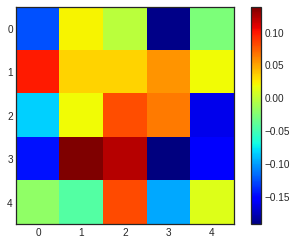

In [114]:
plt.imshow(weight[0, 0, :,:], 'jet')
plt.colorbar()